In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from collections import deque



In [ ]:
class Tablero:
  
  def __init__(self, n : int):
    self.tamanio = n
    self.matriz = np.zeros(shape=(self.tamanio,self.tamanio)).astype(int)
    self.pos_jugador = (-1,-1)
    self.pos_jugador_segundo = (-1,-1)
    self.pos_jugador_tercero = (-1,-1)
    self.pos_jugador_cuarto = (-1,-1)

  def Generar_Tablero(self):

    pos_x = self.tamanio // 2
    pos_y = 0

    pos_x_p2 = (self.tamanio // 2) + 1
    pos_y_p2 = self.tamanio - 1

    pos_x_p3 = 0
    pos_y_p3 = self.tamanio // 2

    pos_x_p4 = self.tamanio - 1
    pos_y_p4 = self.tamanio // 2

    self.matriz[pos_y,pos_x] = 1
    self.matriz[pos_y_p2,pos_x_p2] = 2
    self.matriz[pos_y_p3,pos_x_p3] = 3
    self.matriz[pos_y_p4,pos_x_p4] = 4

    self.pos_jugador = (pos_y,pos_x)
    self.pos_jugador_segundo = (pos_y_p2,pos_x_p2)
    self.pos_jugador_tercero = (pos_y_p3,pos_x_p3)
    self.pos_jugador_cuarto = (pos_y_p4,pos_x_p4)

    return self.matriz

  def Dibujar_Tablero(self):
    plt.figure(figsize=(np.size(self.matriz,0),np.size(self.matriz,1)))
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=False, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True);
    sns.heatmap(self.matriz, linewidths=.1, linecolor='white',annot=True, cmap='magma', yticklabels=False,xticklabels=False, cbar=False, square=True,
                mask=np.array(self.matriz)<0);
    plt.show()

  def get_pos(self):
    return self.pos_jugador
  
  def get_pos_segundo(self):
    return self.pos_jugador_segundo

  def get_pos_tercero(self):
    return self.pos_jugador_tercero

  def get_pos_cuarto(self):
    return self.pos_jugador_cuarto

  def get_tamanio(self):
    return self.tamanio

  def get_matriz(self):
    return self.matriz

In [ ]:
class Grafo:
  def __init__(self, mesa : Tablero):
    self.mesa = mesa
    self.Movimientos_Fila = [1,-1,0,0,1,1,-1,-1]
    self.Movimientos_Columna = [0,0,1,-1,-1,1,-1,1]
    self.Movimientos = list("DURLHPJK")
    self.matriz = self.mesa.get_matriz()
    self.mov_p1 = deque()
    self.mov_p2 = deque()
    self.mov_p3 = deque()
    self.mov_p4 = deque()

    self.visitados = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p2 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p3 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]
    self.visitados_p4 = [[-1 for i in range(self.mesa.get_tamanio())] for j in range(self.mesa.get_tamanio())]

    self.inicio = self.mesa.get_pos()
    self.inicio_p2 = self.mesa.get_pos_segundo()
    self.inicio_p3 = self.mesa.get_pos_tercero()
    self.inicio_p4 = self.mesa.get_pos_cuarto()

    pos = self.mesa.get_tamanio() // 2
    pos_p2 = self.mesa.get_tamanio() // 2
    pos_p3 = self.mesa.get_tamanio() // 2
    pos_p4 = self.mesa.get_tamanio() // 2

    self.destino_01 = (self.mesa.get_tamanio() - 1, pos)
    self.destino_02 = (0, pos_p2 + 2)
    self.destino_03 = (pos_p3 + 2, self.mesa.get_tamanio() - 1)
    self.destino_04 = (pos_p4 + 1, 0)

    self.camino_p1 = 0
    self.camino_p2 = 0
    self.camino_p3 = 0
    self.camino_p4 = 0

  def validacion(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados[fila][columna] == -1) \
    and (self.visitados_p2[fila][columna] == -1)

  def validacion_p2(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p2[fila][columna] == -1)
  
  def validacion_p3(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p3[fila][columna] == -1)

  def validacion_p4(self,fila,columna):
    tamanio = self.mesa.get_tamanio()
    return (fila >= 0) and (fila < tamanio) and (columna >= 0) and (columna < tamanio) \
    and (self.matriz[fila][columna] != 1)  and (self.matriz[fila][columna] != 2) \
    and (self.matriz[fila][columna] != 3) and (self.matriz[fila][columna] != 4) \
    and (self.matriz[fila][columna] != 5) and (self.visitados_p4[fila][columna] == -1)


  def Reconstruir_Camino(self):
    fila,columna = self.destino_01
    while self.visitados[fila][columna] >= 0:
      i = self.visitados[fila][columna]
      self.mov_p1.appendleft(self.Movimientos[i])
      fila -= self.Movimientos_Fila[i]
      columna -= self.Movimientos_Columna[i]
    self.camino_p1 = len(self.mov_p1)

    f_p2,c_p2 = self.destino_02
    while self.visitados_p2[f_p2][c_p2] >= 0:
      i = self.visitados_p2[f_p2][c_p2]
      self.mov_p2.appendleft(self.Movimientos[i])
      f_p2 -= self.Movimientos_Fila[i]
      c_p2 -= self.Movimientos_Columna[i]
    self.camino_p2 = len(self.mov_p2)

    f_p3,c_p3 = self.destino_03
    while self.visitados_p3[f_p3][c_p3] >= 0:
      i = self.visitados_p3[f_p3][c_p3]
      self.mov_p3.appendleft(self.Movimientos[i])
      f_p3 -= self.Movimientos_Fila[i]
      c_p3 -= self.Movimientos_Columna[i]
    self.camino_p3 = len(self.mov_p3)    

    f_p4,c_p4 = self.destino_04
    while self.visitados_p4[f_p4][c_p4] >= 0:
      i = self.visitados_p4[f_p4][c_p4]
      self.mov_p4.appendleft(self.Movimientos[i])
      f_p4 -= self.Movimientos_Fila[i]
      c_p4 -= self.Movimientos_Columna[i]
    self.camino_p4 = len(self.mov_p4)    

  def Mostrar_Camino(self, ganador):
    if ganador == 1:
      fila,columna = self.destino_01
      mov = deque()
      while self.visitados[fila][columna] >= 0:
        i = self.visitados[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 1
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 2:
      fila,columna = self.destino_02
      mov = deque()
      while self.visitados_p2[fila][columna] >= 0:
        i = self.visitados_p2[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 2
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 3:
      fila,columna = self.destino_03
      mov = deque()
      while self.visitados_p3[fila][columna] >= 0:
        i = self.visitados_p3[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 3
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]
    elif ganador == 4:
      fila,columna = self.destino_04
      mov = deque()
      while self.visitados_p4[fila][columna] >= 0:
        i = self.visitados_p4[fila][columna]
        mov.appendleft(self.Movimientos[i])
        self.matriz[fila][columna] = 4
        fila -= self.Movimientos_Fila[i]
        columna -= self.Movimientos_Columna[i]        

  def Paredes(self):
    j = self.mesa.get_tamanio() - 1
    for i in range(1,j):
      pos = self.mesa.get_tamanio() - 2

      pos1 = random.randint(1, pos - 1)
      pos2 = random.randint(1, pos - 2)

      self.matriz[i][random.randint(1, pos1)] = 5
      self.matriz[i][random.randint(1, pos1 + 1)] = 5

      self.matriz[random.randint(1, pos1)][i] = 5
      self.matriz[random.randint(1, pos1 + 1)][i] = 5

  def BFS(self):
    self.visitados[self.inicio[0]][self.inicio[1]] = -2
    self.visitados_p2[self.inicio_p2[0]][self.inicio_p2[1]] = -2
    self.visitados_p3[self.inicio_p3[0]][self.inicio_p3[1]] = -2
    self.visitados_p4[self.inicio_p4[0]][self.inicio_p4[1]] = -2

    cola = deque([self.inicio])
    cola_p2 = deque([self.inicio_p2])
    cola_p3 = deque([self.inicio_p3])
    cola_p4 = deque([self.inicio_p4])

    self.Paredes()
    
    while len(cola):
      fila, columna = cola.popleft()
      for i in range(8):
        nx = fila + self.Movimientos_Fila[i] 
        ny = columna + self.Movimientos_Columna[i] 
        if self.validacion(nx,ny):
          self.visitados[nx][ny] = i
          cola.append((nx,ny))

    while len(cola_p2):
      f_p2,c_p2 = cola_p2.popleft()
      for i in range(8):
        nx_p2 = f_p2 + self.Movimientos_Fila[i]
        ny_p2 = c_p2 + self.Movimientos_Columna[i] 
        if self.validacion_p2(nx_p2,ny_p2):
          self.visitados_p2[nx_p2][ny_p2] = i
          cola_p2.append((nx_p2,ny_p2))   

    while len(cola_p3):
      f_p3,c_p3 = cola_p3.popleft()
      for i in range(8):
        nx_p3 = f_p3 + self.Movimientos_Fila[i]
        ny_p3 = c_p3 + self.Movimientos_Columna[i] 
        if self.validacion_p3(nx_p3,ny_p3):
          self.visitados_p3[nx_p3][ny_p3] = i
          cola_p3.append((nx_p3,ny_p3))

    while len(cola_p4):
      f_p4,c_p4 = cola_p4.popleft()
      for i in range(8):
        nx_p4 = f_p4 + self.Movimientos_Fila[i]
        ny_p4 = c_p4 + self.Movimientos_Columna[i] 
        if self.validacion_p4(nx_p4,ny_p4):
          self.visitados_p4[nx_p4][ny_p4] = i
          cola_p4.append((nx_p4,ny_p4))           

  def Ganador(self):
    self.Reconstruir_Camino()
    ganador = [self.camino_p1, self.camino_p2, self.camino_p3, self.camino_p4]
    minimo = min(ganador)
    
    if minimo == self.camino_p1:
      print("\n\n----------EL GANADOR ES EL PRIMER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p1)
      self.Mostrar_Camino(1)  
    
    elif minimo == self.camino_p2:
      print("\n\n----------EL GANADOR ES EL SEGUNDO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p2)
      self.Mostrar_Camino(2) 

    elif minimo == self.camino_p3:
      print("\n\n----------EL GANADOR ES EL TERCER JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p3)
      self.Mostrar_Camino(3)

    elif minimo == self.camino_p4:
      print("\n\n----------EL GANADOR ES EL CUARTO JUGADOR--------------------")
      print("La cantidad de movimientos realizados es: ", self.camino_p4)
      self.Mostrar_Camino(4)

    print("\n\n---------------------MOVIMIENTOS REALIZADOS---------------------------")
    print("Movimientos realizados por el primer jugador => ", ''.join(self.mov_p1)) 
    print("Movimientos realizados por el segundo jugador => ", ''.join(self.mov_p2))
    print("Movimientos realizados por el tercer jugador => ", ''.join(self.mov_p3))    
    print("Movimientos realizados por el cuarto jugador => ", ''.join(self.mov_p4)) 

  def get_destino(self):
    return self.destino_01
  
  def get_destino_p2(self):
    return self.destino_02

  def get_destino_p3(self):
    return self.destino_03

  def get_destino_p4(self):
    return self.destino_04

In [ ]:
def Tiempo(main,tamanio):
  inicio = time.time()
  main(tamanio)
  final = time.time()
  return (final - inicio) * 1000

In [ ]:
def main(tamanio):
  mesa = Tablero(tamanio)
  mesa.Generar_Tablero()
  mesa.Dibujar_Tablero()

  bfs = Grafo(mesa)
  print("\n\n------------------DATOS GENERALES---------------------------")
  print("La posicion del primer jugador es => ", mesa.get_pos())
  print("La posicion del segundo jugador es => ", mesa.get_pos_segundo())
  print("La posicion del tercero jugador es => ", mesa.get_pos_tercero())
  print("La posicion del cuarto jugador es => ", mesa.get_pos_cuarto())
  print("El tamanio del tablero es => ", mesa.get_tamanio())
  print("El destino del primer jugador es => ", bfs.get_destino())
  print("El destino del segundo jugador es => ", bfs.get_destino_p2())
  print("El destino del tercero jugador es => ", bfs.get_destino_p3())
  print("El destino del cuarto jugador es => ", bfs.get_destino_p4())

  bfs.BFS()
  bfs.Ganador()

  print("\n\n\n-----------------------------CAMINO RECORRIDO---------------------------")
  mesa.Dibujar_Tablero()





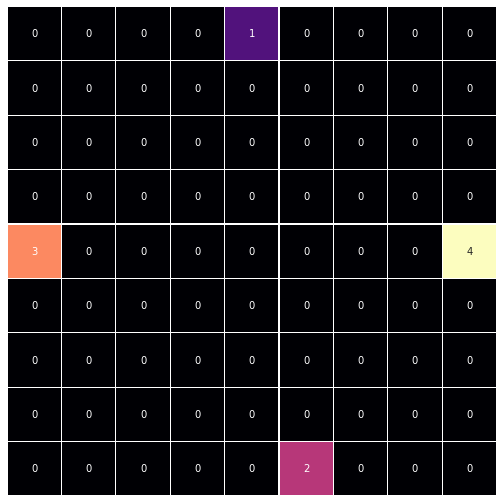



------------------DATOS GENERALES---------------------------
La posicion del primer jugador es =>  (0, 4)
La posicion del segundo jugador es =>  (8, 5)
La posicion del tercero jugador es =>  (4, 0)
La posicion del cuarto jugador es =>  (4, 8)
El tamanio del tablero es =>  9
El destino del primer jugador es =>  (8, 4)
El destino del segundo jugador es =>  (0, 6)
El destino del tercero jugador es =>  (6, 8)
El destino del cuarto jugador es =>  (5, 0)


----------EL GANADOR ES EL SEGUNDO JUGADOR--------------------
La cantidad de movimientos realizados es:  9


---------------------MOVIMIENTOS REALIZADOS---------------------------
Movimientos realizados por el primer jugador =>  RRRPDDHDHHH
Movimientos realizados por el segundo jugador =>  UUUUKKKJL
Movimientos realizados por el tercer jugador =>  DDPPRRKRRK
Movimientos realizados por el cuarto jugador =>  LLLHHLHJU



-----------------------------CAMINO RECORRIDO---------------------------


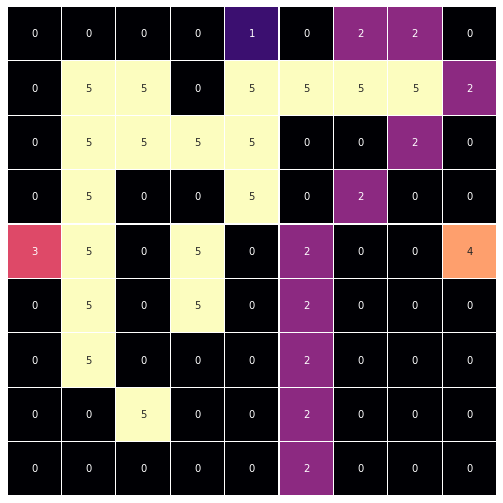



El tiempo es =>  606.7450046539307 segundos


In [ ]:
print("\n\nEl tiempo es => ", Tiempo(main,9), "segundos")